Information about the given data:
    
    ->The given data has the following features:
        
        ->column 1: The age of the person
            
        ->column 2: The year of operation
            
        ->column 3: The number of auxilary nodes detected
            
        ->column 4: The survival span of the patient
            
            ->If it is 1 then the patient survived for more than 5 years
            
            ->If it is two then the patient is not survived for more than 5 years
            

           
Objective:
    
    -> Performing the exploratory data analysis
    
    -> To determine the survival span of the future patient with detected nodes and age

Importing the required libraries to process

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as s

loading the data data and Information about the data

In [3]:
data = pd.read_csv('haberman.csv')

Information about the data:
    
    -> Shape of data
    
    -> Dimensionality of data
    
    -> Features of data
    
    -> Sample of data

In [4]:
print(data.shape)
print(data.ndim)
print(data.columns)
print(data.head())

(305, 4)
2
Index(['30', '64', '1', '1.1'], dtype='object')
   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


Giving column names to the dataset,since we got the data without column names

In [5]:
colnames = ["age",'opeartionyear','auxilarynodes','lifespan']
data = pd.read_csv('haberman.csv',names=colnames)

In [6]:
print(data.shape)
print(data.ndim)
print(data.head(4))

(306, 4)
2
   age  opeartionyear  auxilarynodes  lifespan
0   30             64              1         1
1   30             62              3         1
2   30             65              0         1
3   31             59              2         1


In [7]:
data['lifespan'].value_counts()

1    225
2     81
Name: lifespan, dtype: int64

observations:

1.225 patients are survived more than 5 years                                                                          
2.81 patients were survived less than 5 years

UNIVARIATE ANALYSIS:
    
    HISTOGRAMS:

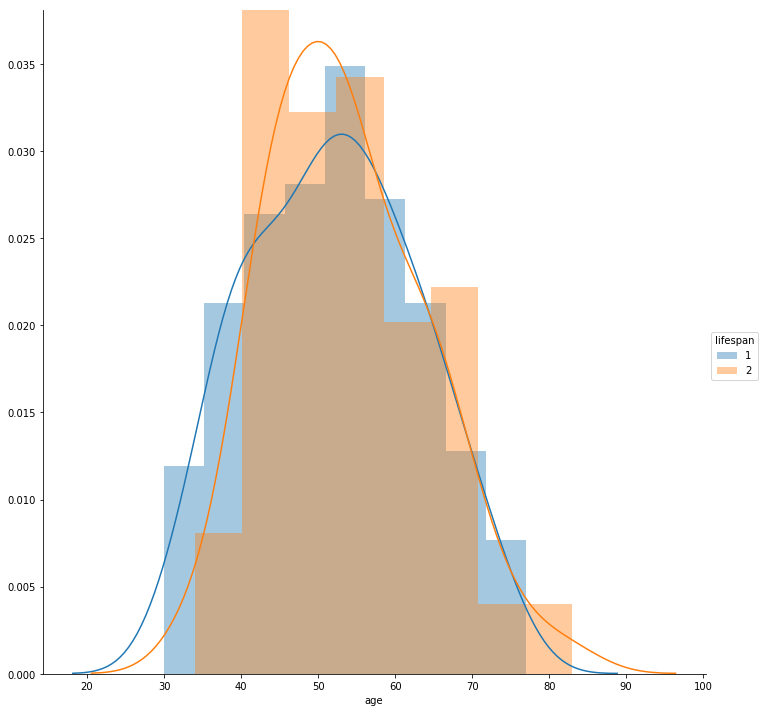

In [10]:
s.FacetGrid(data,hue='lifespan',size=10).map(s.distplot,'age').add_legend()
mp.show()

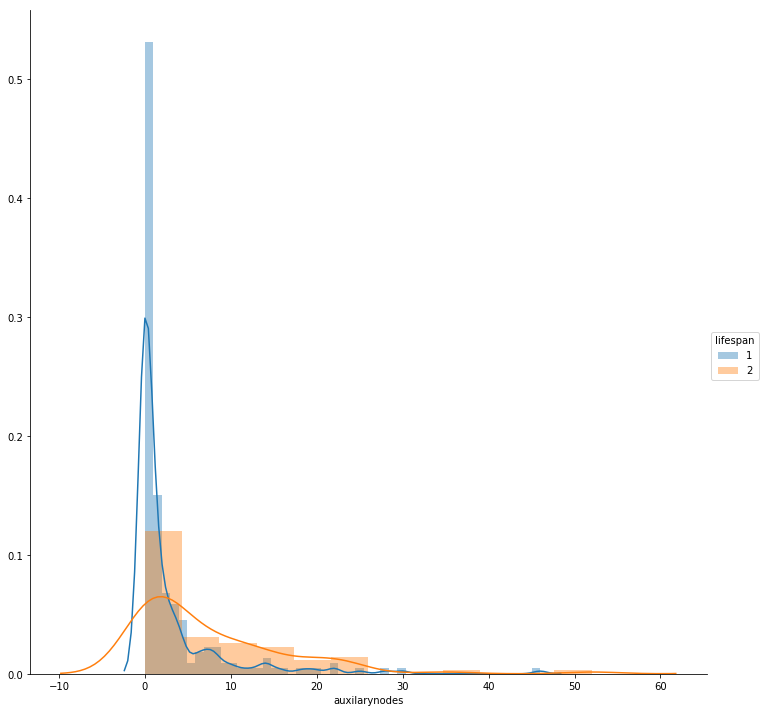

In [11]:
s.FacetGrid(data,hue='lifespan',size=10).map(s.distplot,'auxilarynodes').add_legend()
mp.show()

observation:

    Univariate Analysis:
    
        Histograms:
    
            -> Age: There is lot of overlap between the class labels by using the age attribute for analysis
    
            -> Auxilary nodes: The distribution of people who lived more than 5 years is very peak, where as the   
               
               distribution of the people who lived less than 5 years is more skewed.

BIVARIATE ANALYSIS:

    SCATTER PLOTS:
    
        -> Bivariate analysis is done on more than one feature

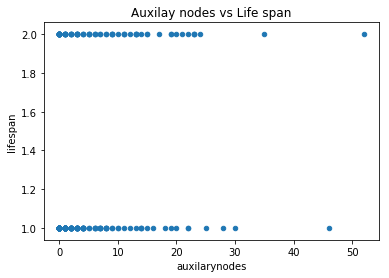

In [15]:
data.plot(kind='scatter',x='auxilarynodes',y='lifespan')
mp.title("Auxilay nodes vs Life span")
mp.show()

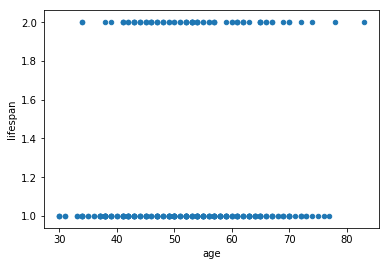

In [19]:
data.plot(kind='scatter',x='age',y='lifespan')

Observations:
    
    -> From bivariate analysis, we can plot the figure between two attributes
    
    -> By using auxilary nodes and age the results are highly overlapped

PAIRPLOT:

    -> We can also analysis the bivariate analysis using the pairplots

    -> Lets plot the pairplot which gives more information with the combination of all of them
        
    -> Pariplot will  plot the graph between every combination of features
        
    -> When there were high number of features we get bery high number of plots

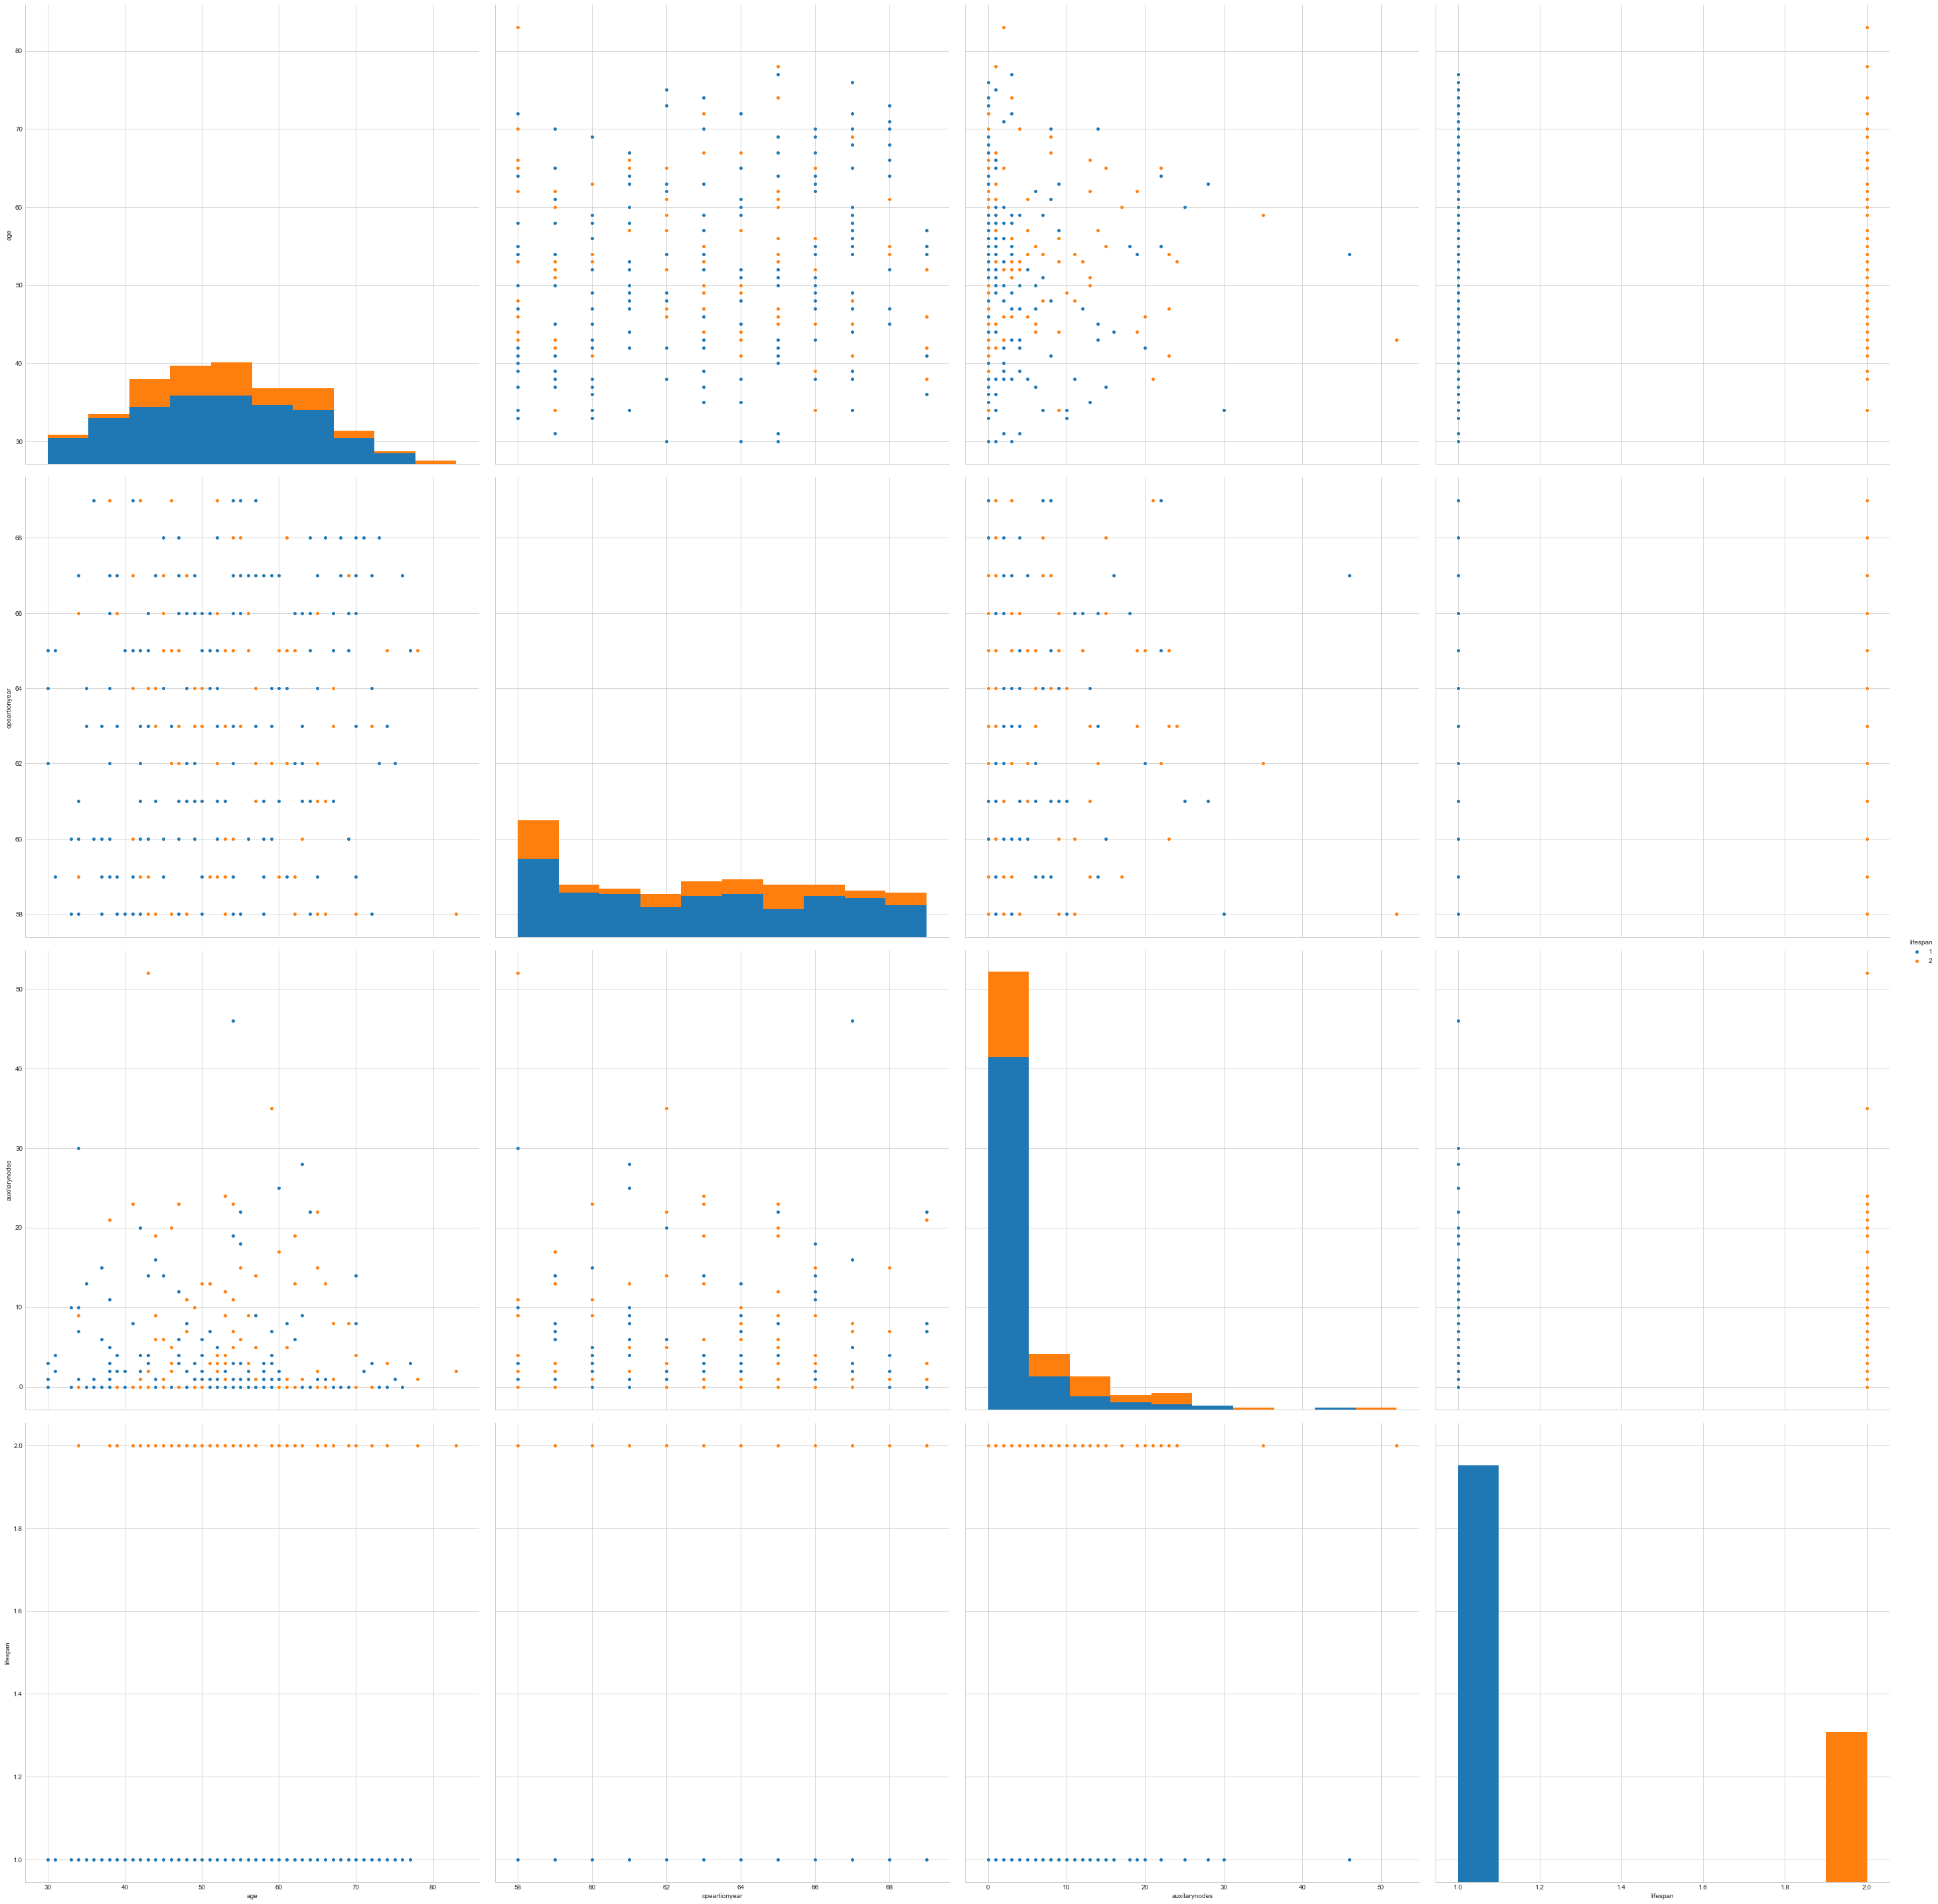

In [16]:
s.set_style('whitegrid')
s.pairplot(data,hue='lifespan',size=10)
mp.show()

Observation:

    -> From the pairplot the auxilary nodes attribute is more useful to estimate the surviaval span



PDF,CDF OF AUXILARYNODES

[0.24761187 0.04901961 0.01759678 0.02011061 0.00754148 0.01508296
 0.00377074 0.00628457 0.00879839 0.00251383 0.00125691 0.00125691
 0.         0.00125691 0.         0.         0.         0.00125691
 0.         0.00125691]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]
[0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
[0.64379085 0.77124183 0.81699346 0.86928105 0.88888889 0.92810458
 0.9379085  0.95424837 0.97712418 0.98366013 0.9869281  0.99019608
 0.99019608 0.99346405 0.99346405 0.99346405 0.99346405 0.99673203
 0.99673203 1.        ]


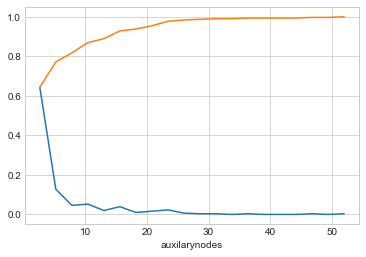

In [17]:
c,b = np.histogram(data['auxilarynodes'],bins=20,density=True)
pdf = c/(sum(c))
cdf = np.cumsum(pdf)
print(c)
print(b)
print(pdf)
print(cdf)
mp.plot(b[1:],pdf)
mp.plot(b[1:],cdf)
mp.xlabel('auxilarynodes')
mp.show()

Observation:

    -> Here we can conclude that 80 percent of the patients are having less than 6 auxilary nodes
    

PDF,CDF for Age

[0.00616599 0.01356517 0.00986558 0.02343076 0.03699593 0.01973116
 0.03082994 0.03452954 0.03082994 0.03699593 0.03206314 0.01849797
 0.02466395 0.02589715 0.00739919 0.01479837 0.00616599 0.0024664
 0.0012332  0.0012332 ]
[30.   32.65 35.3  37.95 40.6  43.25 45.9  48.55 51.2  53.85 56.5  59.15
 61.8  64.45 67.1  69.75 72.4  75.05 77.7  80.35 83.  ]
[0.01633987 0.03594771 0.02614379 0.0620915  0.09803922 0.05228758
 0.08169935 0.09150327 0.08169935 0.09803922 0.08496732 0.04901961
 0.06535948 0.06862745 0.01960784 0.03921569 0.01633987 0.00653595
 0.00326797 0.00326797]
[0.01633987 0.05228758 0.07843137 0.14052288 0.23856209 0.29084967
 0.37254902 0.46405229 0.54575163 0.64379085 0.72875817 0.77777778
 0.84313725 0.91176471 0.93137255 0.97058824 0.9869281  0.99346405
 0.99673203 1.        ]


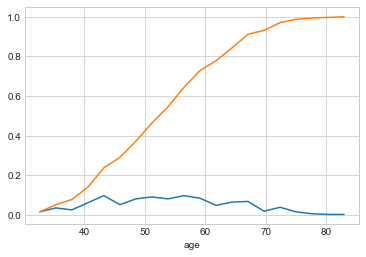

In [18]:
c,b = np.histogram(data['age'],bins=20,density=True)
pdf = c/(sum(c))
cdf = np.cumsum(pdf)
print(c)
print(b)
print(pdf)
print(cdf)
mp.plot(b[1:],pdf)
mp.plot(b[1:],cdf)
mp.xlabel('age')
mp.show()

Observation:
    
    -> More than 75 percent of people were less than the age of 60


PDF,CDF for LIFESPAN

[14.70588235  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          5.29411765]
[1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
[0.73529412 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.26470588]
[0.73529412 0.73529412 0.73529412 0.73529412 0.73529412 0.73529412
 0.73529412 0.73529412 0.73529412 0.73529412 0.73529412 0.73529412
 0.73529412 0.73529412 0.73529412 0.73529412 0.73529412 0.73529412
 0.73529412 1.        ]


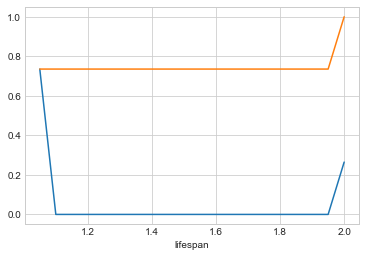

In [19]:
c,b = np.histogram(data['lifespan'],bins=20,density=True)
pdf = c/(sum(c))
cdf = np.cumsum(pdf)
print(c)
print(b)
print(pdf)
print(cdf)
mp.plot(b[1:],pdf)
mp.plot(b[1:],cdf)
mp.xlabel('lifespan')
mp.show()

BOXPLOTS:

       -> By using box plots we can the percentile and quantiles ranges of each feature

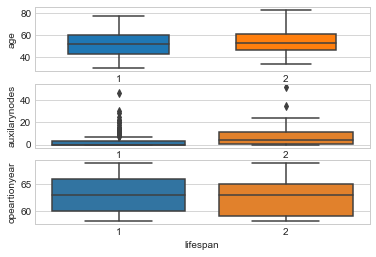

In [20]:
mp.figure(1)
mp.subplot(311)
s.boxplot(x='lifespan',y='age',data=data,width=0.6,saturation=5)
mp.subplot(312)
s.boxplot(x='lifespan',y='auxilarynodes',data=data)
mp.subplot(313)
s.boxplot(x='lifespan',y='opeartionyear',data=data)

Observation:

          -> People with auxilary nodes less than 5 have survived for more than 5 years
          
          -> More than 75 percent of the patients have age less than 60
          
        



VIOLINPLOTS:

           -> These plots were the combination of box plots and their probability density functions
           
           -> From these plots we can see the spread and the quantile ranges

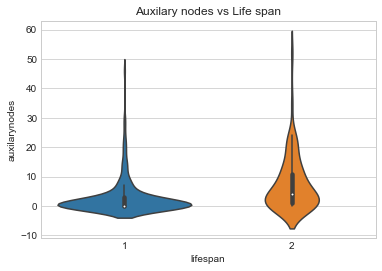

In [23]:
s.violinplot(x='lifespan',y='auxilarynodes',data=data)
mp.title("Auxilary nodes vs Life span")
mp.show()

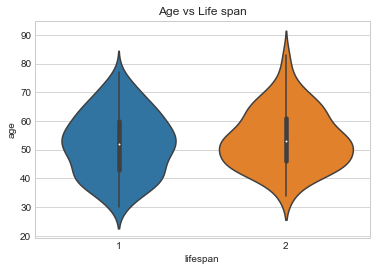

In [24]:
s.violinplot(x='lifespan',y='age',data=data)
mp.title("Age vs Life span")
mp.show()

Observation:

         ->Auxilary nodes will be more useful contribute to determine the survival span than the age attribute

Numerical Analysis:

    -> From the graphical analysis we can visualize the plots, lets try some numerical analysis

In [25]:
lifespan1 = data[data['lifespan']==1]
lifespan2 = data[data['lifespan']==2]

In [26]:
print('Numerical analysis on who lived more than 5 years')
print(np.mean(lifespan1))
print('Numerical analysis on who lived less than 5 years')
print(np.mean(lifespan2))

Numerical analysis on who lived more than 5 years
age              52.017778
opeartionyear    62.862222
auxilarynodes     2.791111
lifespan          1.000000
dtype: float64
Numerical analysis on who lived less than 5 years
age              53.679012
opeartionyear    62.827160
auxilarynodes     7.456790
lifespan          2.000000
dtype: float64


Observations:

    From the numerical analysis we can conclude that:
    
        ->Patients who have auxilary nodes less than 3 have survived for more than 5 years
        
        ->Those who are having more than 3 auxilary nodes have not survived for more than 5 years
        
        ->The average age of patients who survived more than 5 years is 52
        
        ->The average age of patients who survived less than 5 years is 54

Final Conclusion From Numerical and Graphical Analysis:

    -> Number of auxilary nodes is the most useful feature to predict the lifespan of a patient
    
    -> Age and operation year are overlapping most of times
    
    -> Having auxilary nodes less than 3 have more chances of living more than 5 years
    
    -> Having auxilary nodes more than 3 have very less chances of living more than 5 years